In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<h1>Two-body problem</h1>

<h2>Test particle orbits</h2>

In the lectures, we have considered test particle orbits around a central mass. We saw that orbital motion is confined to a plane, and that bound orbits come in the form of ellipses. We can numerically integrate the equations of motion to visualize the motion. In the visualizations below, the star is indicated by the star symbol, and the test particle by the green circle.

<IPython.core.display.Javascript object>


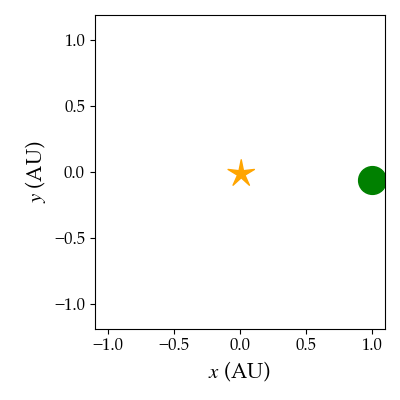

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

from nbody import nbody as nb
from nbody import plot as p

# Try and make plots look nice
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams["font.serif"] = 'Palatino'
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

orb = nb.Orbit(mass_ratio=0, eccentricity=0)

fig = plt.figure(figsize=(4,4),num='Test particle orbit')
ax = plt.gca()
ax.axis('equal')

ax.set_xlabel(r'$x$ (AU)', fontsize=15)
ax.set_ylabel(r'$y$ (AU)', fontsize=15)

plot_p, = ax.plot(np.asarray(orb.plan_pos)[:,0], 
                  np.asarray(orb.plan_pos)[:,1],
                  marker='o', ms=20, color='green', ls='None')

plot_s, = ax.plot(np.asarray(orb.star_pos)[:,0], 
                  np.asarray(orb.star_pos)[:,1],
                  marker='$\star$', ms=20, color='orange', ls='None')

plot_p.set_data(np.asarray(orb.plan_pos)[0,0], 
                np.asarray(orb.plan_pos)[0,1])
plot_s.set_data(np.asarray(orb.star_pos)[0,0], 
                np.asarray(orb.star_pos)[0,1])

plt.tight_layout()

Below an animation is shown for a circular orbit. Move the slider to change the eccentricity of the orbit (it may take some time to generate the animation). 

In [3]:
# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass_ratio=0, eccentricity=0)
display(p.Anim(orb).show(fig, ax, plot_p, plot_s), display_id='span')

# When slider is moved, update animation
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass_ratio=0, eccentricity=change['new'])
        update_display(p.Anim(orb).show(fig, ax, plot_p, plot_s), display_id='span')
        
w.observe(on_value_change, names='value')

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

By varying the eccentricity and looking at the orbit, can you determine:
- Where is pericentre/apocentre? 
- What is the value of the semimajor axis? 
- How does the speed of the particle change with phase?

The variation of speed can also be seen in a plot of velocity versus time. This is further explored in Exercise Sheet 2, question 3.


FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

<IPython.core.display.Javascript object>


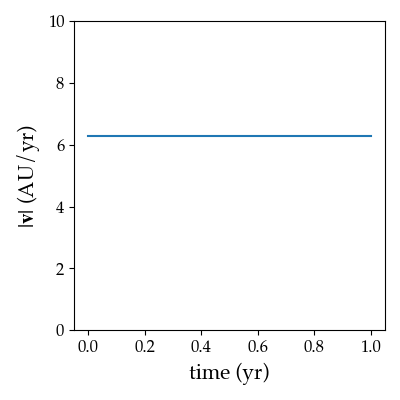

In [4]:
# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass_ratio=0, eccentricity=0)

vxp = np.asarray(orb.plan_vel)[:,0]
vyp = np.asarray(orb.plan_vel)[:,1]

fig2 = plt.figure(figsize=(4,4),num='Velocity')
ax2 = plt.gca()

ax2.set_xlabel(r'time (yr)', fontsize=15)
ax2.set_ylabel(r'$|{\bf v}|$ (AU/yr)', fontsize=15)

ax2.set_ylim([0,10])
line, = ax2.plot(orb.time, np.sqrt(vxp*vxp + vyp*vyp))

plt.tight_layout()

# When slider is moved, update plot
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass_ratio=0, eccentricity=change['new'])
        vxp = np.asarray(orb.plan_vel)[:,0]
        vyp = np.asarray(orb.plan_vel)[:,1]
        
        line.set_data(orb.time, np.sqrt(vxp*vxp + vyp*vyp))
        
        ax2.relim()
        ax2.autoscale()

w.observe(on_value_change, names='value')

<h2>Kepler's laws</h2>

Kepler (1609, 1619) formulated three laws of planetary motion. 

<h3>First law</h3>
The first law states that **"The planets move in ellipses with the Sun at one focus"**. We have seen in the lectures that we do get ellipsoidal motion for test particles. The focal points of an ellipse lie on its longest axis, at a distance $c = \sqrt{a^2-b^2}$ from the centre of the ellipse (see e.g. [here](https://en.wikipedia.org/wiki/Ellipse)). Vary the eccentricity of the orbit in the plot below to verify that the star is indeed in one of the foci.

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

<IPython.core.display.Javascript object>


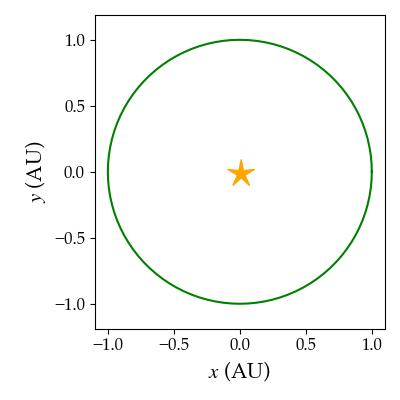

In [5]:
# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

orb = nb.Orbit(mass_ratio=0, eccentricity=0)

fig3 = plt.figure(figsize=(4,4),num='Kepler\'s first law')
ax3 = plt.gca()
ax3.axis('equal')

ax3.set_xlabel(r'$x$ (AU)', fontsize=15)
ax3.set_ylabel(r'$y$ (AU)', fontsize=15)

xp = np.append(np.asarray(orb.plan_pos)[:,0], orb.plan_pos[0,0])
yp = np.append(np.asarray(orb.plan_pos)[:,1], orb.plan_pos[0,1])

plot_p2, = ax3.plot(xp, yp, color='green')

plot_s2, = ax3.plot(np.asarray(orb.star_pos)[:,0], 
                    np.asarray(orb.star_pos)[:,1],
                    marker='$\star$', ms=20, color='orange', ls='None')

plot_s2.set_data(np.asarray(orb.star_pos)[0,0], 
                np.asarray(orb.star_pos)[0,1])

plt.tight_layout()

# When slider is moved, update plot
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass_ratio=0, eccentricity=change['new'], n_sample=1000)
        
        xp = np.append(np.asarray(orb.plan_pos)[:,0], orb.plan_pos[0,0])
        yp = np.append(np.asarray(orb.plan_pos)[:,1], orb.plan_pos[0,1])

        plot_p2.set_data(xp, yp)
        
        ax3.relim()
        ax3.autoscale()
                
w.observe(on_value_change, names='value')

In the lectures, we derived the point of closest approach to be at $r=a(1-e)$. It is a straightforward exercise to show that this means that the star is indeed in one of the foci of the ellipse. 

<h3>Second law</h3>
Kepler's second law states that **"A radius vector from the Sun to a planet sweeps out equal areas in equal times"**. In the figure below, the blue region lies between two radius vectors at $t=0$ (pericentre) and $t=T/2$ (half the period).  

<IPython.core.display.Javascript object>


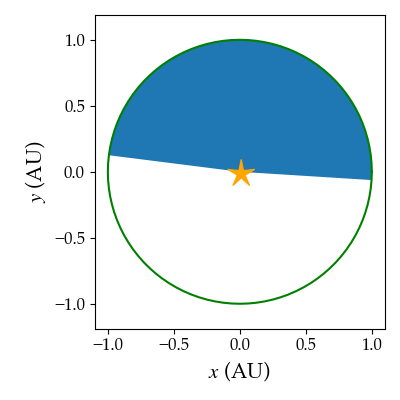

In [6]:
orb = nb.Orbit(mass_ratio=0, eccentricity=0)

fig4 = plt.figure(figsize=(4,4),num='Kepler\'s second law')
ax4 = plt.gca()
ax4.axis('equal')

ax4.set_xlabel(r'$x$ (AU)', fontsize=15)
ax4.set_ylabel(r'$y$ (AU)', fontsize=15)

xp = np.append(np.asarray(orb.plan_pos)[:,0], orb.plan_pos[0,0])
yp = np.append(np.asarray(orb.plan_pos)[:,1], orb.plan_pos[0,1])

xs = np.asarray(orb.star_pos)[0,0]
ys = np.asarray(orb.star_pos)[0,1]

plot_p3, = ax4.plot(xp, yp, color='green')
plot_s3, = ax4.plot(xs, ys, 
                    marker='$\star$', ms=20, color='orange', ls='None')

xsel = np.append(xp[0:50], np.asarray([xs, xp[0]]))
ysel = np.append(yp[0:50], np.asarray([ys, yp[0]]))

coll, = plt.fill(xsel, ysel)
    
plt.tight_layout()


Kepler's second law yields that when we let those two radius vectors evolve along the orbit, the area of the blue region should be constant. In other words, at all times half the ellipse should be blue. The animation below visualises this. By playing the animation, or by moving the time slider by hand, you can convince yourself that indeed half of the ellipse is blue at all times. 

In [7]:
# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb = nb.Orbit(mass_ratio=0, eccentricity=0)
display(p.AnimKep2(orb).show(fig4, ax4, coll, plot_p3, plot_s3, ndiff=50), display_id='span2')

# When slider is moved, update animation
def on_value_change(change):
    with output:
        orb = nb.Orbit(mass_ratio=0, eccentricity=change['new'])
        update_display(p.AnimKep2(orb).show(fig4, ax4, coll, plot_p3, plot_s3, ndiff=50), display_id='span2')
        
w.observe(on_value_change, names='value')

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

A more formal derivation shows that Keplers second law is due to angular momentum conservation. Consider a small time interval $\delta t$ in which the planet changes its orbital radius and polar angle by a tiny amount. See the figure below. The resulting change in area is $\delta A = \frac{1}{2} r(r+\delta r) \sin(\delta\phi)\approx \frac{r^2\delta\phi}{2}$. Divide by $\delta t$ and let $\delta t\rightarrow 0$ to arrive at $d_tA = L/2$. 
![image](area.jpg)


<h3>Third law</h3>

The third law states **"The square of the orbital period of a planet is proportional to the cube of its semi-major axis"**. In the figure below, a test particle was added with semi-major axis $2^{-2/3}$ AU. 

<IPython.core.display.Javascript object>


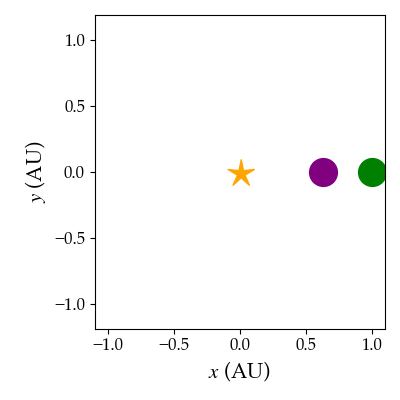

In [8]:
orb1 = nb.Orbit(mass_ratio=0, eccentricity=0)
orb2 = nb.Orbit(semi_major=(0.5)**(2/3), mass_ratio=0, eccentricity=0)

fig5 = plt.figure(figsize=(4,4),num='Kepler\'s third law')
ax5 = plt.gca()
ax5.axis('equal')

ax5.set_xlabel(r'$x$ (AU)', fontsize=15)
ax5.set_ylabel(r'$y$ (AU)', fontsize=15)

plot_p1, = ax5.plot(np.asarray(orb1.plan_pos)[:,0], 
                    np.asarray(orb1.plan_pos)[:,1],
                    marker='o', ms=20, color='green', ls='None')
plot_p2, = ax5.plot(np.asarray(orb2.plan_pos)[:,0], 
                    np.asarray(orb2.plan_pos)[:,1],
                    marker='o', ms=20, color='purple', ls='None')

plot_s, = ax5.plot(np.asarray(orb1.star_pos)[:,0], 
                   np.asarray(orb1.star_pos)[:,1],
                   marker='$\star$', ms=20, color='orange', ls='None')

plot_p1.set_data(np.asarray(orb1.plan_pos)[0,0], 
                 np.asarray(orb1.plan_pos)[0,1])
plot_p2.set_data(np.asarray(orb2.plan_pos)[0,0], 
                 np.asarray(orb2.plan_pos)[0,1])
plot_s.set_data(np.asarray(orb1.star_pos)[0,0], 
                np.asarray(orb1.star_pos)[0,1])

plt.tight_layout()

According to the third law, the new particle should have half the orbital period of the original particle. You can play the animation below to show that this is indeed the case, and independent of eccentricity. 

In [9]:
# Create eccentricity slider
w = widgets.FloatSlider(
    value=0.0,
    min=0,
    max=0.95,
    step=0.01,
    description='Eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

# Display eccentricity slider
output = widgets.Output()
display(w, output)

# Create circular orbit animation
orb1 = nb.Orbit(mass_ratio=0, eccentricity=0)
orb2 = nb.Orbit(semi_major=(0.5)**(2/3), mass_ratio=0, eccentricity=0, n_sample=200)
display(p.AnimKep3(orb1, orb2).show(fig5, ax5, plot_p1, plot_p2, plot_s), display_id='span3')

# When slider is moved, update animation
def on_value_change(change):
    with output:
        orb1 = nb.Orbit(mass_ratio=0, eccentricity=change['new'])
        orb2 = nb.Orbit(semi_major=(0.5)**(2/3), mass_ratio=0, eccentricity=change['new'])
        update_display(p.AnimKep3(orb1, orb2).show(fig5, ax5, plot_p1, plot_p2, plot_s), display_id='span3')
        
w.observe(on_value_change, names='value')

FloatSlider(value=0.0, continuous_update=False, description='Eccentricity:', max=0.95, step=0.01)

Output()

The third law is easy to derive from the second law. As shown above, the area swept out by the radius vector changes as $d_t A = L/2$. In orbital period $T$, area swept out must equal the total area of the ellipse: $A=\pi a b$. Hence we must have that $\pi a b = LT/2$. In the first exercise sheet, you get to show that $L^2 = GM a(1-e^2)$. Therefore we get that $T = 2\pi \sqrt{a^3/(GM)}$.
